
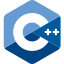
<br>

<div style="text-align:center; font-size:200%;">
  <b>Project: Adventure Game</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Academy Munich</div>
<br/>
<!-- 03 Project Adventure Game.ipynb -->
<!-- slides/module_410_unit_testing/topic_310_project_adventure_game.cpp -->




### Introduction

- The goal of this project is not just to build a simple game, but to
  experience how good architecture can emerge from a strict TDD process.
- Write the *simplest possible code* to make each test pass, even if it feels
  wrong or hardcoded.
- The magic happens in the **refactoring** step.
- The stories are carefully ordered to lead towards a clean, decoupled
  design.
- Make sure to follow the TDD cycle. Make sure you refactor during each
  cycle, using the principles discussed in previous lectures.
- You are not expected to finish the entire project in a single week. Only
  tackle as much as you can in the time available.


### Part 1: Establishing the Core Loop and World Structure

This part focuses on movement and the representation of the world. The
initial implementation will likely involve hardcoded strings and if
statements.

A starter kit is available in the repository under
`code/starter_kits/project_adventure_sk`.


#### **Story 1: Starting the Game**

* **As a player, I want to start the game, so that I can see the description
  of the starting room.**
* **Acceptance Criteria:**
  * When the game starts, the text "You are in the Grand Hall. It is a vast,
    echoing chamber." is displayed.
* **Notes:**
  * This initial story will probably lead you to the creation of a `Game`
    class.
  * Don't be afraid to hardcode data for now.
  * Pay attention to the testability of your code. E.g., prefer to have a
    method that returns the current output instead of printing directly to
    the console.


#### **Story 2: Moving to a Connected Room**

* **As a player, I want to move North from the starting room, so that I can
  explore the world.**
* **Acceptance Criteria:**
  * Given I am in the "Grand Hall".
  * When I enter the command to move north,
  * I see the text "You are in the Armoury. Racks of dusty weapons line the
    walls."
* **Notes:**
  * This may require you to introduce new concepts in the refactoring step.
  * Once again, pay attention that you keep the code well-structured and
    testable. In particular, separate the logic of moving from any user
    interface code you write.


#### **Story 3: Moving Back and Forth (The "Triangulation" Story)**

* **As a player, I want to be able to move from the Armoury back to the Grand
  Hall, so that I can navigate between rooms.**
* **Acceptance Criteria:**
  * Given I have moved north into the "Armoury".
  * When I enter the command to move south,
  * I see the text "You are in the Grand Hall. It is a vast, echoing
    chamber."


#### **Story 4: Handling Invalid Moves**

* **As a player, I want to be told in which directions I can move.**
* **Acceptance Criteria:**
  * Given I am in the "Grand Hall" and there are exits to the North and
    South, but not to the East and West.
  * I see an indication that I can only move North or South.


### **Part 2: Interacting with the World and the Player**

This part introduces new verbs and the concept of a player with their own
state (inventory).


#### **Story 5: Investigating a Room**

* **As a player, I want to investigate the current room, so that I can find
  hidden items.**
* **Acceptance Criteria:**
  * Given the "Armoury" contains a hidden "rusty sword".
  * When I am in the Armoury and enter the command to investigate.
  * I see the text "You search the room. You found a rusty sword!".


#### **Story 6: Taking a Visible Item**

* **As a player, I want to take an item that I have found, so that I can add
  it to my inventory.**
* **Acceptance Criteria:**
  * Given I have investigated the Armoury and found the "rusty sword".
  * When I enter the command to take the rusty sword.
  * The "rusty sword" is no longer in the room, and it is now in my
    inventory.


#### **Story 7: Remembering Room State**

* **As a player, I want rooms to remember their state, so that the world
  feels persistent.**
* **Acceptance Criteria:**
  * Given I have investigated the Armoury, seen a "rusty sword" and a "golden
    chalice", and taken the "rusty sword".
  * When I move South to the Grand Hall and then move North back to the
    Armoury.
  * The "golden chalice" is still visible, but the "rusty sword" is no longer
    there.
  * If I investigate again, the "rusty sword" is not re-discovered.


### **Part 3: The Architectural Leap (towards Hexagonal Architecture)**

This part focuses on decoupling the core game logic from the user interface.
These kinds of developer stories should only be used rarely in real projects,
but we use them here to push towards a clean/hexagonal architecture.


#### **Story 8: The Purity Refactor (A Developer Story)**

* **As a developer, I want to test the game's logic without caring about the
  console text, so that I can create an AI "bot" that can play the game by
  reading its state.**
* **Acceptance Criteria:**
  * The core Game engine should provide a raw data representation of the
    current game state (e.g., a dictionary or a Data Transfer Object).
  * This data object should contain the room description, the path to the
    room's image, the available choices, and the player's inventory.
  * A separate component (an **Adapter**) should be responsible for taking
    this data object and formatting it into the user-facing string for the
    console.


#### **Story 9: Adding Visuals Easily**

* **As a player, I want to see an image for each room, so that the game is
  more immersive.**
* **Acceptance Criteria:**
  * Given each room has an associated mage.
  * When I enter a room, the image for that room is displayed above its
    description.